<a href="https://colab.research.google.com/github/preethamak/ML/blob/main/RandomForestClassifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("3) Sentiment dataset.csv")  #load data

In [6]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [8]:
# Step 5: Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Step 6: Strip whitespace and standardize text columns
df['text'] = df['text'].str.strip().str.lower()
df['sentiment'] = df['sentiment'].str.strip().str.capitalize()
df['user'] = df['user'].str.strip()
df['platform'] = df['platform'].str.strip()
df['country'] = df['country'].str.strip()

# Step 7: Print results
print("Data cleaned successfully!")
print(f"Final shape: {df.shape}")
print("\nUnique Sentiment Labels:")
print(df['sentiment'].value_counts())

Data cleaned successfully!
Final shape: (732, 13)

Unique Sentiment Labels:
sentiment
Positive                45
Joy                     44
Excitement              37
Contentment             19
Neutral                 18
                        ..
Celestial wonder         1
Nature's beauty          1
Thrilling journey        1
Whispers of the past     1
Relief                   1
Name: count, Length: 191, dtype: int64


/tmp/ipython-input-929445570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='pastel')


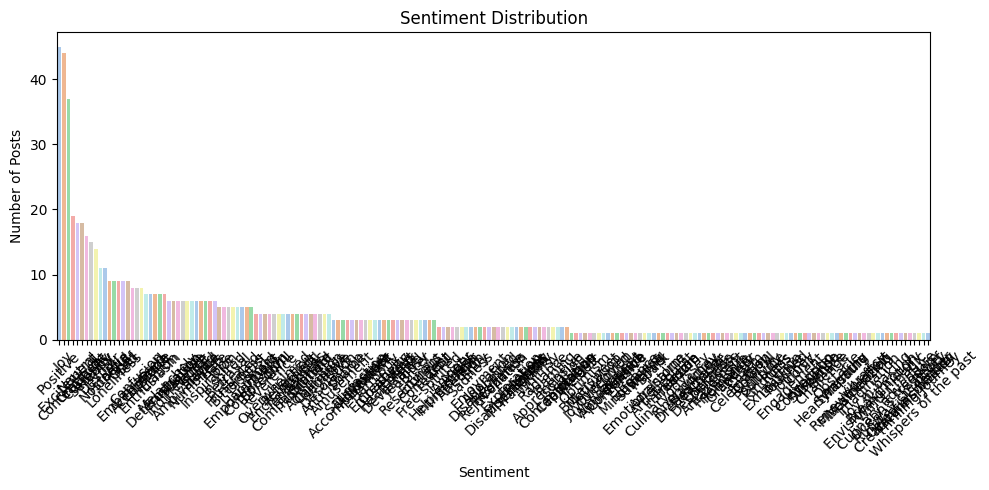

In [9]:

# Count of sentiment labels
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sentiment_distribution_bar.png")
plt.show()

/tmp/ipython-input-695608672.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='platform', y='likes', estimator='mean', palette='muted')


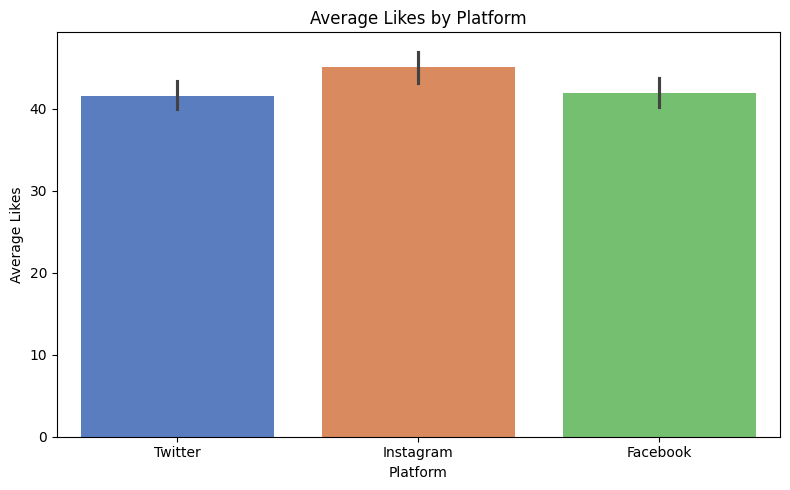

In [10]:
# Average likes per platform (numeric + categorical combo)
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='platform', y='likes', estimator='mean', palette='muted')
plt.title("Average Likes by Platform")
plt.ylabel("Average Likes")
plt.xlabel("Platform")
plt.tight_layout()
plt.savefig("avg_likes_by_platform.png")
plt.show()

In [11]:
#Interpretation:
#This chart reveals which platforms generate more average likes per post.

#Useful for understanding platform behavior:

#    High engagement on Instagram may suggest its visual appeal.

#    Lower likes on Twitter could reflect text-heavy or fast-moving content.

#Helps decide where to focus marketing or content strategy.
#Level 2 – Task 3: Sentiment Analysis / NLP Visualization
#Goals
#We’ll extract and visualize:

#Sentiment count distribution (already done in Level 1)

#Word Cloud for overall text

#Word Clouds per sentiment (e.g., Joy, Frustration)

#Optional: Top frequent words (using tokenization)

In [12]:
pip install wordcloud

In [13]:
from wordcloud import WordCloud
from collections import Counter
import re

In [14]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['text'] = df['text'].str.strip().str.lower()
df['sentiment'] = df['sentiment'].str.strip().str.capitalize()

In [15]:
# Basic clean-up: remove punctuation
def clean_text(text):
    return re.sub(r'[^\w\s]', '', str(text).lower().strip())

df['clean_text'] = df['text'].apply(clean_text)

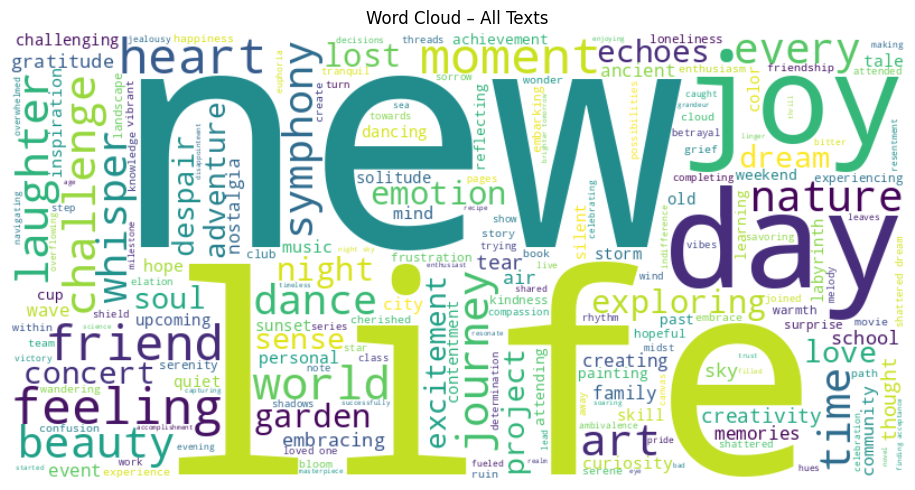

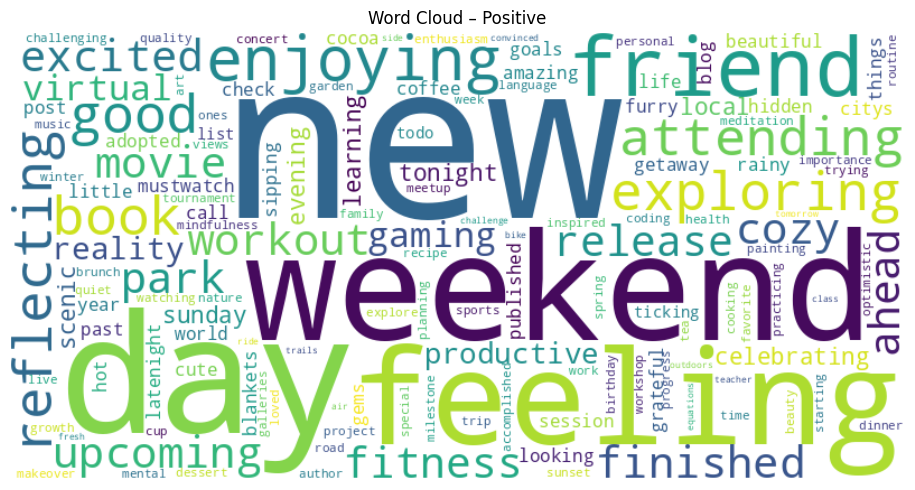

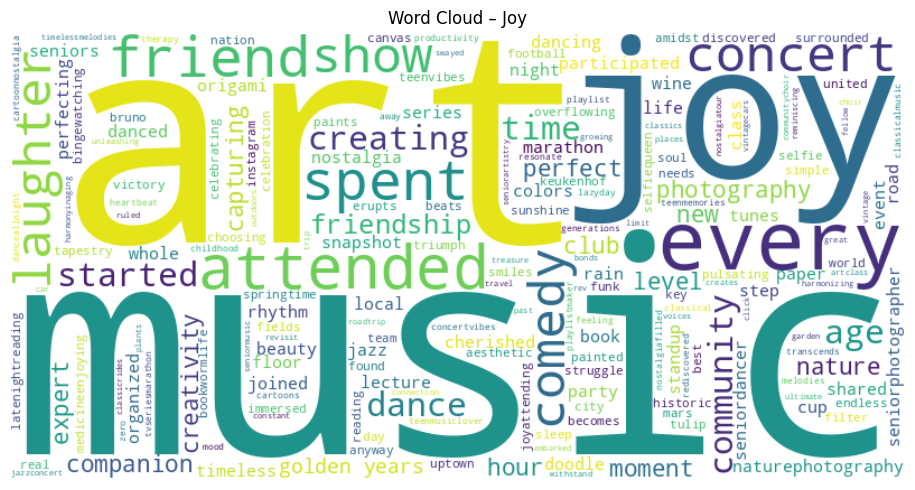

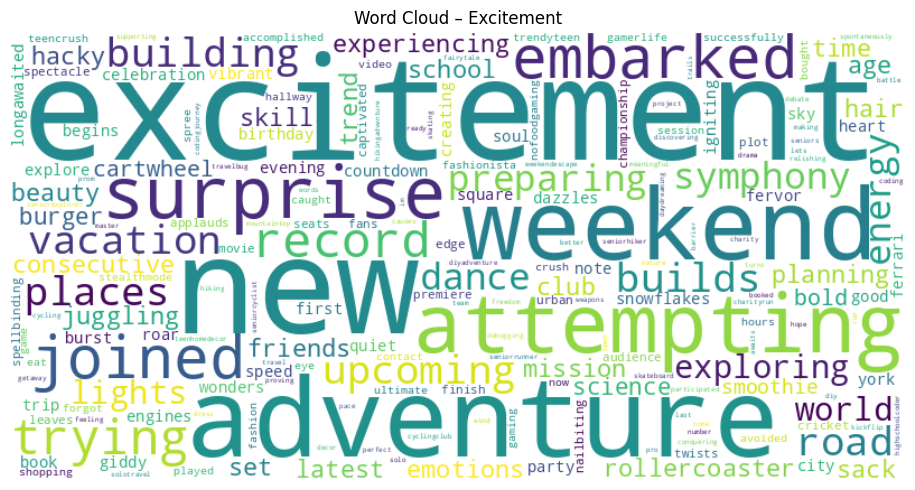

In [16]:
#Word Cloud for ALL Text
all_words = ' '.join(df['clean_text'].dropna())
wc = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – All Texts")
plt.tight_layout()
plt.savefig("wordcloud_all_texts.png")
plt.show()

#Word Clouds by Sentiment (top 3)
top_sentiments = df['sentiment'].value_counts().nlargest(3).index

for sentiment in top_sentiments:
    text_subset = df[df['sentiment'] == sentiment]['clean_text']
    words = ' '.join(text_subset.dropna())
    wc = WordCloud(width=800, height=400, background_color='white').generate(words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud – {sentiment}")
    plt.tight_layout()
    plt.savefig(f"wordcloud_{sentiment.lower()}.png")
    plt.show()